## Imports and loads

In [1]:
import os, sys
from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.model_selection import ShuffleSplit, cross_val_score
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import tensorflow as tf
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, f1_score
from sklearn.metrics import r2_score
from sklearn import linear_model
from scipy.stats import linregress
from scipy.stats import spearmanr
from sklearn.base import  BaseEstimator, TransformerMixin, ClassifierMixin
from sklearn.model_selection import StratifiedShuffleSplit
from scipy.signal import butter, filtfilt, lfilter, welch, lfilter_zi, stft
import pandas as pd
from scipy.stats import spearmanr
from sklearn.model_selection import LeaveOneOut
import pickle
from time import time
from  scipy.spatial.distance import squareform
import matplotlib.colors as colors
import matplotlib.cm as cmx
import pickle

In [2]:
!pip install mne==0.19
import mne
!pip install git+https://github.com/UN-GCPDS/python-gcpds.utils.git
from gcpds.utils import loaddb

     |████████████████████████████████| 6.4MB 7.5MB/s 
  Cloning https://github.com/UN-GCPDS/python-gcpds.utils.git to /tmp/pip-req-build-e128y0pw
  Running command git clone -q https://github.com/UN-GCPDS/python-gcpds.utils.git /tmp/pip-req-build-e128y0pw
  Created wheel for gcpds-utils: filename=gcpds_utils-0.1a3-cp36-none-any.whl size=96944 sha256=1470b15663240f8b098c5ee59e0e379f2ad223fa118d5c7d0cf29aabf5e8d741
  Stored in directory: /tmp/pip-ephem-wheel-cache-dwa_gepb/wheels/ab/4a/1e/d215a31a12c0fa202a9bccc9b9d68874deb08dfdce8b7d43c8
Successfully built gcpds-utils


In [3]:
from mne.io.pick import _picks_to_idx
from mne.viz.topomap import _check_outlines, _draw_outlines
from mne.viz import plot_topomap

In [4]:
FILEID = "1Em1PGP6Ybpgu3Fx0HJznYELIr7obFufV"
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id='$FILEID -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id="$FILEID -O grafos_suxchaxfre.zip && rm -rf /tmp/cookies.txt
!dir
!unzip grafos_suxchaxfre.zip

--2021-01-25 22:52:30--  https://docs.google.com/uc?export=download&confirm=&id=1Em1PGP6Ybpgu3Fx0HJznYELIr7obFufV
Resolving docs.google.com (docs.google.com)... 74.125.142.139, 74.125.142.138, 74.125.142.102, ...
Connecting to docs.google.com (docs.google.com)|74.125.142.139|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0s-9c-docs.googleusercontent.com/docs/securesc/7ra2k90k07kats7pjk6fu7v23o47r6gs/792souv9eqd0d03bbatsdb2j1bilaijv/1611615150000/17600740636788319470/12287349962924259553Z/1Em1PGP6Ybpgu3Fx0HJznYELIr7obFufV?e=download [following]
--2021-01-25 22:52:31--  https://doc-0s-9c-docs.googleusercontent.com/docs/securesc/7ra2k90k07kats7pjk6fu7v23o47r6gs/792souv9eqd0d03bbatsdb2j1bilaijv/1611615150000/17600740636788319470/12287349962924259553Z/1Em1PGP6Ybpgu3Fx0HJznYELIr7obFufV?e=download
Resolving doc-0s-9c-docs.googleusercontent.com (doc-0s-9c-docs.googleusercontent.com)... 74.125.20.132, 2607:f8b0:400e:c07::84
Connecting to d

## Networks definitions


In [5]:
seed = 100
np.random.seed(seed)
tf.random.set_seed(seed)
        
class SMRfeat(BaseEstimator, TransformerMixin):
  def __init__(self):
    self
      
  
  def scalerlist(self,Xfull):
     self.scaler = len(Xfull)*[None]
     for i in range(len(Xfull)):
        self.scaler[i] = StandardScaler()
        Xfull[i] = self.scaler[i].fit_transform(Xfull[i])
     return Xfull


  def fit(self,Xepochs,*_):
      
      Xfull = [Xepochs[:,:,i] for i in range(Xepochs.shape[2])]


      
      self.scalerlist(Xfull)
      return 

  def transform(self,Xepochs,*_):   
      
          
      
      Xfull = [Xepochs[:,:,i] for i in range(Xepochs.shape[2])]

      
      for i in range(len(Xfull)):
         self.scaler[i] = StandardScaler()
         Xfull[i] = self.scaler[i].fit_transform(Xfull[i])
      return Xfull

  def fit_transform(self,Xepochs,*_):
      self.fit(Xepochs)
      return self.transform(Xepochs)   
class MCSMRDNN(BaseEstimator, TransformerMixin):
  def __init__(self,epochs=200,batch_size=32,learning_rate=1e-3,optimizer='Adam',
                l1_param=1e-3,l2_param=1e-3,validation_split=0.2,verbose=0,fs=512,scalex=1,scaley=1,droprate=0.2,Mc_iter=100,alpha_dropout=True,plot_hst = False):
        self.epochs = epochs
        self.scalex = scalex
        self.scaley = scaley
        self.batch_size = batch_size
        self.learning_rate=learning_rate 
        self.l1_param=l1_param 
        self.l2_param=l2_param
        self.validation_split = validation_split
        self.verbose = verbose
        self.optimizer = optimizer
        self.fs=fs
        self.droprate = droprate
        self.Mc_iter = Mc_iter
        self.alpha_dropout = alpha_dropout
        self.plot_hst = plot_hst
  
  def fit(self,X,y,*_):

    #entrenar predictor SMRDNN
    if self.optimizer == "Adam":
        opt = tf.keras.optimizers.Adam(learning_rate=self.learning_rate)
    elif self.optimizer == "SGD":
        opt = tf.keras.optimizers.SGD(learning_rate=self.learning_rate)
    else:
        opt=self.optimizer
    
    tf.keras.backend.clear_session()
    seed = 100
    np.random.seed(seed)
    tf.random.set_seed(seed)
    Q1f = 1.5
    Qff = 0.5
    l1 = self.l1_param
    l2 = self.l2_param
    act1 = 'tanh'
    actf = 'tanh'
    inputs = len(X)*[None]
    hiddens = len(X)*[None]
    drop_1 = len(X)*[None]
    winitializer = tf.keras.initializers.GlorotNormal(seed=seed)
    binitializer = "zeros"
    #h1
    for i in range(len(X)):
        inputs[i] = tf.keras.layers.Input(shape=(X[i].shape[1]), name='in_'+str(i))
        hiddens[i] = tf.keras.layers.Dense(int(X[i].shape[1]*Q1f),activation=act1,kernel_regularizer=tf.keras.regularizers.l1_l2(l1=l1,l2=l2),kernel_initializer=winitializer,bias_initializer=binitializer,name='h1_'+str(i))(inputs[i])
        if self.alpha_dropout:
            drop_1[i] = tf.keras.layers.AlphaDropout(self.droprate,seed=seed)(hiddens[i])
        else:
            drop_1[i] = tf.keras.layers.Dropout(self.droprate)(hiddens[i])
    #concat
    concat = tf.keras.layers.concatenate(drop_1,name='concat')
    #concat = tf.keras.layers.concatenate([h1c3psd,h1c4psd],name='concat')
    Qh = np.sum([X[i].shape[1]*Q1f for i in range(len(X))])
    
    hfi = tf.keras.layers.Dense(Qh*Qff,activation=actf,kernel_regularizer=tf.keras.regularizers.l1_l2(l1=l1,l2=l2),
                              kernel_initializer=winitializer,
                              bias_initializer=binitializer,name='hfi')(concat)
    if self.alpha_dropout:
        drop_2 = tf.keras.layers.AlphaDropout(rate=self.droprate)(hfi)
    else:
        drop_2 = tf.keras.layers.Dropout(rate=self.droprate)(hfi)
    #cla
    output_c = tf.keras.layers.Dense(1,activation="linear",kernel_initializer=winitializer, bias_initializer=binitializer,
                                    kernel_regularizer=tf.keras.regularizers.l1_l2(l1=l1,l2=l2),name='outc')(drop_2) 
    #input_full = [ic3_tuz,ic4_tuz,ic3_tbz,ic4_tbz,ic3_psdz,ic4_psdz]
    self.model_fun = tf.keras.Model(inputs=inputs,outputs=[output_c])

    self.model_fun.compile(loss=tf.keras.losses.mae,#self.custom_loss(),
              optimizer=opt) #f1, precision, recall, crossentropy

    self.history = self.model_fun.fit(x=X, y=y,verbose=self.verbose,
                        epochs=self.epochs,batch_size=self.batch_size,validation_split=self.validation_split)
    if self.plot_hst:
        self.plot_history_acc_w()
  def predict(self, X, *_):
    return np.stack([self.model_fun(X,training=True) for sample in range(self.Mc_iter)])#self.model_fun.predict(X)

  def fit_predict(self,X,y,*_):
      self.fit(X,y)
      return  self.predict(X)
  def get_model(self):
      return self.model_fun
  def plot_history_acc_w(self):
      hpd = pd.DataFrame(self.history.history)
      #hpd[['loss','val_loss']].plot()
      hpd.plot()
      plt.show()
      return


In [6]:
class SMRDNN(BaseEstimator, TransformerMixin):
  def __init__(self,epochs=200,batch_size=32,learning_rate=1e-3,optimizer='Adam',
                l1_param=1e-3,l2_param=1e-3,validation_split=0.2,verbose=0,fs=512,scalex=1,scaley=1):
        self.epochs = epochs
        self.scalex = scalex
        self.scaley = scaley
        self.batch_size = batch_size
        self.learning_rate=learning_rate 
        self.l1_param=l1_param 
        self.l2_param=l2_param
        self.validation_split = validation_split
        self.verbose = verbose
        self.optimizer = optimizer
        self.fs=fs
  
  def fit(self,X,y,*_):

    #entrenar predictor SMRDNN
    if self.optimizer == "Adam":
        opt = tf.keras.optimizers.Adam(learning_rate=self.learning_rate)
    elif self.optimizer == "SGD":
        opt = tf.keras.optimizers.SGD(learning_rate=self.learning_rate)
    else:
        opt=self.optimizer
    
    tf.keras.backend.clear_session()
    seed = 100
    np.random.seed(seed)
    tf.random.set_seed(seed)

    Q1f = 1.5
    Qff = 0.5
    l1 = self.l1_param
    l2 = self.l2_param
    act1 = 'tanh'
    actf = 'tanh'
    inputs = len(X)*[None]
    hiddens = len(X)*[None]
    winitializer = tf.keras.initializers.GlorotNormal(seed=seed)
    binitializer = "zeros"
    #h1
    for i in range(len(X)):
        inputs[i] = tf.keras.layers.Input(shape=(X[i].shape[1]), name='in_'+str(i))
        hiddens[i] = tf.keras.layers.Dense(int(X[i].shape[1]*Q1f),activation=act1,kernel_regularizer=tf.keras.regularizers.l1_l2(l1=l1,l2=l2),kernel_initializer=winitializer,bias_initializer=binitializer,name='h1_'+str(i))(inputs[i])

    #concat
    concat = tf.keras.layers.concatenate(hiddens,name='concat')
    #concat = tf.keras.layers.concatenate([h1c3psd,h1c4psd],name='concat')
    Qh = np.sum([X[i].shape[1]*Q1f for i in range(len(X))])
    
    hfi = tf.keras.layers.Dense(Qh*Qff,activation=actf,kernel_regularizer=tf.keras.regularizers.l1_l2(l1=l1,l2=l2),
                              kernel_initializer=winitializer,
                              bias_initializer=binitializer,name='hfi')(concat)

    #cla
    output_c = tf.keras.layers.Dense(1,activation="linear",kernel_initializer=winitializer, bias_initializer=binitializer,
                                    kernel_regularizer=tf.keras.regularizers.l1_l2(l1=l1,l2=l2),name='outc')(hfi) 
    #input_full = [ic3_tuz,ic4_tuz,ic3_tbz,ic4_tbz,ic3_psdz,ic4_psdz]
    self.model_fun = tf.keras.Model(inputs=inputs,outputs=[output_c])

    self.model_fun.compile(loss=tf.keras.losses.mae,#self.custom_loss(),
              optimizer=opt) #f1, precision, recall, crossentropy

    self.history = self.model_fun.fit(x=X, y=y,verbose=self.verbose,
                        epochs=self.epochs,batch_size=self.batch_size,validation_split=self.validation_split)
    self.plot_history_acc_w()
  def predict(self, X, *_):
    return  self.model_fun.predict(X)

  def fit_predict(self,X,y,*_):
      self.fit(X,y)
      return  self.predict(X)
      
  def get_model(self):
      return self.model_fun

  def plot_history_acc_w(self):
      hpd = pd.DataFrame(self.history.history)
      #hpd[['loss','val_loss']].plot()
      hpd.plot()
      plt.show()
      return

## Functions definitions

In [7]:
def get_weigths(model,bands):
    W = []
    for i in range(bands):
        w = np.sum(abs(mdl.get_layer('h1_'+str(i)).get_weights()[0]),axis=1)
        w = w-min(w)
        w/= max(w)
        W.append(w)
    return W

In [8]:
def create_tensor_giga(graf,ind):
    xtensor = []
    for i in ind:
      if i>= 29 and i<34:
        subjs= graf[i-2,:,:]
      elif i>=34:
        subjs= graf[i-3,:,:]
      else:
        subjs= graf[i-1,:,:]

      try:
        xtensor+=[subjs]
      except:
        print('s'+str(i+1))

    xtensor= np.asarray(xtensor)
    print(xtensor.shape)
    return xtensor

In [9]:
def plot_topomap_cx(rho,fs, channels_names,montage,Ch,thr=0.5,size=(10,10),mode="topo",weigths=True,cmaps="jet",colormap=True,save=False,name=""):
    layout = mne.channels.read_layout('EEG1005')
    info = mne.create_info(layout.names, sfreq=fs, ch_types="eeg",montage=montage)
    pos = np.array([(p[0] + p[2] / 2., p[1] + p[3] / 2.) for p in layout.pos])

    # pick channels
    picks = _picks_to_idx(info,channels_names)
    pos = pos[picks]
    # adjust positions
    pos, outlines = _check_outlines(pos, 'head')
    pos_x = pos[:,0]
    pos_y = pos[:,1]
    names = np.array(layout.names)[picks]
    rho=((rho-rho.min())/(rho.max()-rho.min()))
    cmap = plt.cm.jet
    cNorm  = colors.Normalize(vmin=np.min(rho), vmax=np.max(rho))
    scalarMap = cmx.ScalarMappable(norm=cNorm,cmap=cmap)

    if weigths:
        rhotopo = squareform(rho).sum(axis=1)
    else:
        rhotopo = rho
    rhotopo = rhotopo-rhotopo.min()
    rhotopo /= rhotopo.max()
    
    f = plt.figure(figsize=size)
    ax = plt.axes()

    if mode=="topo":
        #P = int(0.5*Ch*(Ch-1))

        #plt.figure(figsize=(10,10))
        plot_topomap(rhotopo, pos, cmap=cmaps, show=False, contours=0, sensors=False,vmin=0,vmax=1)

    elif mode=="Cx":
        rhok = squareform(rho)

        if thr >1:
            r = np.flip(np.sort(rho))
            r2 = np.cumsum(r)
            r3 = r2<=(thr*r2.max())/100
            #print(r3)
            indx_pct = np.where(np.triu(rhok)>r[r3][-1])
            #print(r.max(),r[r3][-1],rhok.max())
        else:
            indx_pct = np.where(np.triu(rhok)>thr)
        ax.set(xticks=[], yticks=[], aspect='equal')
        #ax[frec,time].scatter(pos[:,0],pos[:,1],100)
        _draw_outlines(ax, outlines)
        for i in range(np.shape(indx_pct)[-1]):
            ch1=indx_pct[0][i]
            ch2=indx_pct[1][i]     
            ax.arrow(pos_x[ch1],pos_y[ch1],pos_x[ch2]-pos_x[ch1],
                    pos_y[ch2]-pos_y[ch1],head_width=0.0,length_includes_head=False,
                    width=0.003,color=scalarMap.to_rgba(rhok[ch1,ch2]))
        for ch1 in  np.unique(np.ravel(indx_pct)):
            ax.scatter(pos_x[ch1],pos_y[ch1],50*np.sum(np.ravel(indx_pct)==ch1),'gray')
            ax.annotate(names[ch1], xy=pos[ch1,:],size=15)
        ax.axis("off")
    elif mode=="All":
        plot_topomap(rhotopo, pos, cmap=cmaps, show=False, contours=0, sensors=False,vmin=0,vmax=1)
        rhok = squareform(rho)

        if thr >1:
            indx_pct = np.where(np.triu(rhok)>np.percentile(rho, thr))
        else:
            indx_pct = np.where(np.triu(rhok)>thr)
        ax.set(xticks=[], yticks=[], aspect='equal')
        #ax[frec,time].scatter(pos[:,0],pos[:,1],100)
        _draw_outlines(ax, outlines)
        for i in range(np.shape(indx_pct)[-1]):
            ch1=indx_pct[0][i]
            ch2=indx_pct[1][i]     
            ax.arrow(pos_x[ch1],pos_y[ch1],pos_x[ch2]-pos_x[ch1],
                    pos_y[ch2]-pos_y[ch1],head_width=0.0,length_includes_head=False,
                    width=0.003,color=scalarMap.to_rgba(rhok[ch1,ch2]))
        for ch1 in  np.unique(np.ravel(indx_pct)):
            ax.scatter(pos_x[ch1],pos_y[ch1],50*np.sum(np.ravel(indx_pct)==ch1),'gray')
            ax.annotate(names[ch1], xy=pos[ch1,:],size=15)
        

    if colormap:
        cax = f.add_axes([0.95, 0.125, 0.02, 0.75])
        sm = plt.cm.ScalarMappable(cmap='jet')
        sm.set_array(rho.ravel())
        plt.colorbar(sm,cax=cax)
    
    if save:
        plt.savefig(name+'.eps',format='eps',dpi=100,bbox_inches='tight')

    plt.show()

## Path definition

In [10]:
Path_def = "/content/drive/MyDrive/Papers/CX_Regression/codigos/physionet/Figs/"
folder_name = 'Cx/'
tr = 75

## wPLI

### Load Data

In [ ]:
FILEID = "1Oz0eBrVKJdAYXYuRJrMPHgIihW5YaUA5"
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id='$FILEID -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id="$FILEID -O Data_rest_giga.zip && rm -rf /tmp/cookies.txt
!dir
!unzip Data_rest_giga.zip

--2021-01-25 21:52:52--  https://docs.google.com/uc?export=download&confirm=&id=1Oz0eBrVKJdAYXYuRJrMPHgIihW5YaUA5
Resolving docs.google.com (docs.google.com)... 172.217.13.78, 2607:f8b0:4004:80a::200e
Connecting to docs.google.com (docs.google.com)|172.217.13.78|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0g-74-docs.googleusercontent.com/docs/securesc/f2rrhclo0gij18q6mb7d802ciuueaapf/mhf1ctupj150rviq6sjn9bmquuuu4edr/1611611550000/13064322042220169363/06075937942691133809Z/1Oz0eBrVKJdAYXYuRJrMPHgIihW5YaUA5?e=download [following]
--2021-01-25 21:52:53--  https://doc-0g-74-docs.googleusercontent.com/docs/securesc/f2rrhclo0gij18q6mb7d802ciuueaapf/mhf1ctupj150rviq6sjn9bmquuuu4edr/1611611550000/13064322042220169363/06075937942691133809Z/1Oz0eBrVKJdAYXYuRJrMPHgIihW5YaUA5?e=download
Resolving doc-0g-74-docs.googleusercontent.com (doc-0g-74-docs.googleusercontent.com)... 172.217.164.129, 2607:f8b0:4004:814::2001
Connecting to doc-0g-74-

In [ ]:
FILEID = "1el7jjPiNqV9Vg4jBLrWbviohikrVQYC6"
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id='$FILEID -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id="$FILEID -O conectividad_frank.zip && rm -rf /tmp/cookies.txt
!dir
!unzip conectividad_frank.zip

--2021-01-25 21:52:54--  https://docs.google.com/uc?export=download&confirm=&id=1el7jjPiNqV9Vg4jBLrWbviohikrVQYC6
Resolving docs.google.com (docs.google.com)... 172.217.2.110, 2607:f8b0:4004:801::200e
Connecting to docs.google.com (docs.google.com)|172.217.2.110|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-14-ag-docs.googleusercontent.com/docs/securesc/cokf8mcdrrmkrr4ofphq1pr806cjp22s/2bs4c1ll3p3npcs5q0a024of7nguke1t/1611611550000/17600740636788319470/00375823010162705373Z/1el7jjPiNqV9Vg4jBLrWbviohikrVQYC6?e=download [following]
--2021-01-25 21:52:54--  https://doc-14-ag-docs.googleusercontent.com/docs/securesc/cokf8mcdrrmkrr4ofphq1pr806cjp22s/2bs4c1ll3p3npcs5q0a024of7nguke1t/1611611550000/17600740636788319470/00375823010162705373Z/1el7jjPiNqV9Vg4jBLrWbviohikrVQYC6?e=download
Resolving doc-14-ag-docs.googleusercontent.com (doc-14-ag-docs.googleusercontent.com)... 172.217.164.129, 2607:f8b0:4004:814::2001
Connecting to doc-14-ag-

In [ ]:
sc_ma = StandardScaler()
#ma_z = sc_ma.fit_transform(pickle.load(open( "phy_y.pickle", "rb" )))
data = loadmat('/content/drive/MyDrive/Papers/CX_Regression/datosFrank/Acc_physionet.mat')
mea = data['y']
zpca = StandardScaler().fit_transform(mea)
zpca.shape

(105, 1)

In [ ]:
xtensor = loadmat("/content/Conectividad_wpli_physionet.mat")['Cxa'][:,:,[0,1,3]]

### Training No MC

Epoch 1/200
3/3 [==============================] - 3s 269ms/step - loss: 711.4078 - val_loss: 653.1047
Epoch 2/200
3/3 [==============================] - 0s 62ms/step - loss: 654.9802 - val_loss: 577.0430
Epoch 3/200
3/3 [==============================] - 0s 60ms/step - loss: 570.8771 - val_loss: 501.8701
Epoch 4/200
3/3 [==============================] - 0s 56ms/step - loss: 494.2984 - val_loss: 443.0964
Epoch 5/200
3/3 [==============================] - 0s 114ms/step - loss: 430.5972 - val_loss: 386.9106
Epoch 6/200
3/3 [==============================] - 0s 59ms/step - loss: 377.9397 - val_loss: 339.6281
Epoch 7/200
3/3 [==============================] - 0s 56ms/step - loss: 331.2574 - val_loss: 295.9801
Epoch 8/200
3/3 [==============================] - 0s 56ms/step - loss: 288.4506 - val_loss: 257.8653
Epoch 9/200
3/3 [==============================] - 0s 57ms/step - loss: 251.2583 - val_loss: 225.0610
Epoch 10/200
3/3 [==============================] - 0s 57ms/step - loss: 219.232

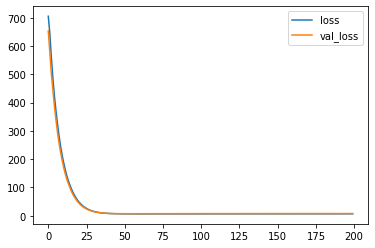

In [ ]:
feats= SMRfeat()
X_feat = feats.fit_transform(xtensor)
net= SMRDNN(verbose=1,epochs=200,l1_param=1e-3,l2_param=1e-3,validation_split=0.1)
predict_data = net.fit(X_feat , zpca)

mdl = net.get_model()
w = get_weigths(mdl,3)

### Plots No MC

In [ ]:
db = loaddb.PhysionetMMI('databases/PhysionetMMI')
channels_names = ['FC5', 'FC3', 'FC1', 'FCz', 'FC2', 'FC4', 'FC6', 'C5', 'C3', 'C1', 'Cz', 'C2', 'C4', 'C6', 'CP5', 'CP3', 'CP1', 'CPz', 'CP2', 'CP4', 'CP6', 'Fp1', 'Fpz', 'Fp2', 'AF7', 'AF3', 'AFz', 'AF4', 'AF8', 'F7', 'F5', 'F3', 'F1', 'Fz', 'F2', 'F4', 'F6', 'F8', 'FT7', 'FT8', 'T7', 'T8', 'T9', 'T10', 'TP7', 'TP8', 'P7', 'P5', 'P3', 'P1', 'Pz', 'P2', 'P4', 'P6', 'P8', 'PO7', 'PO3', 'POz', 'PO4', 'PO8', 'O1', 'Oz', 'O2', 'Iz'] 

montage = mne.channels.read_montage(db.metadata['montage'])

Model = {}
#Model["model"] = mdl
Model["weigths"] = w
Model["Ch_names"] = channels_names
Model["montage"] = montage

with open(Path_def+'models/'+folder_name+'wPLI_3f.p','wb') as handle:
                pickle.dump(Model,handle)

/usr/local/lib/python3.6/dist-packages/mne/utils/docs.py:824: DeprecationWarning: Function read_montage is deprecated; ``read_montage`` is deprecated and will be removed in v0.20. Please use ``read_dig_fif``, ``read_dig_egi``, ``read_custom_montage``, or ``read_dig_captrack`` to read a digitization based on your needs instead; or ``make_standard_montage`` to create ``DigMontage`` based on template; or ``make_dig_montage`` to create a ``DigMontage`` out of np.arrays
  warnings.warn(msg, category=DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/mne/utils/docs.py:807: DeprecationWarning: Class Montage is deprecated; Montage class is deprecated and will be removed in v0.20. Please use DigMontage instead.
  warnings.warn(msg, category=DeprecationWarning)


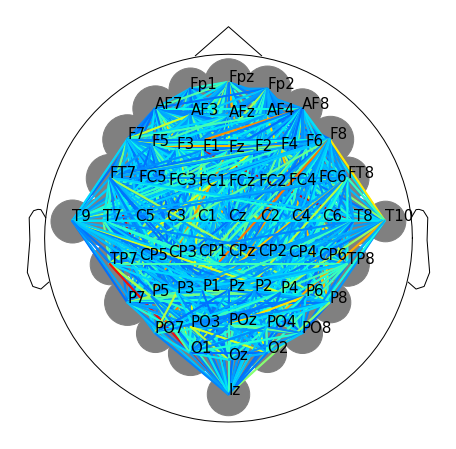

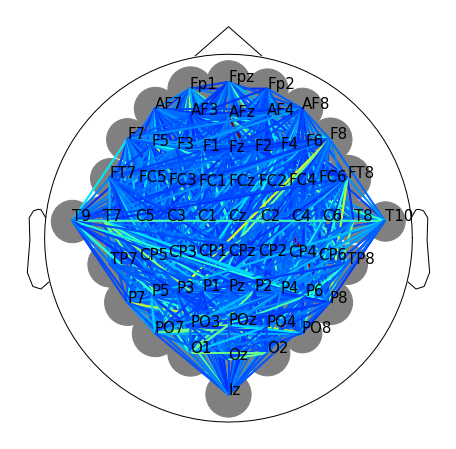

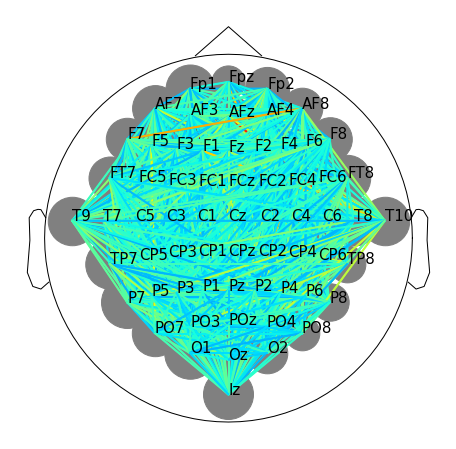

In [ ]:
#plot_topomap_cx(w[0],512, channels_names,montage,Ch=len(channels_names), thr=0.6,size=(8,8),mode="topo",colormap=False,save=True,name=Path_def+'Topoplots/wPLI_3f_topo_t')
plot_topomap_cx(w[0],512, channels_names,montage,Ch=len(channels_names), thr=tr,size=(8,8),mode="Cx",colormap=False,save=True,name=Path_def+'Topoplots/'+folder_name+'wPLI_3f_Cx_t')
#plot_topomap_cx(w[0],512, channels_names,montage,Ch=len(channels_names), thr=0.6,size=(8,8),mode="All",cmaps="Reds",colormap=False,save=True,name=Path_def+'Topoplots/wPLI_3f_All_t')

#plot_topomap_cx(w[1],512, channels_names,montage,Ch=len(channels_names), thr=0.6,size=(8,8),mode="topo",colormap=False,save=True,name=Path_def+'Topoplots/wPLI_3f_topo_u')
plot_topomap_cx(w[1],512, channels_names,montage,Ch=len(channels_names), thr=tr,size=(8,8),mode="Cx",colormap=False,save=True,name=Path_def+'Topoplots/'+folder_name+'wPLI_3f_Cx_u')
#plot_topomap_cx(w[1],512, channels_names,montage,Ch=len(channels_names), thr=0.6,size=(8,8),mode="All",cmaps="Reds",colormap=False,save=True,name=Path_def+'Topoplots/wPLI_3f_All_u')

#plot_topomap_cx(w[2],512, channels_names,montage,Ch=len(channels_names), thr=0.6,size=(8,8),mode="topo",colormap=False,save=True,name=Path_def+'Topoplots/wPLI_3f_topo_B')
plot_topomap_cx(w[2],512, channels_names,montage,Ch=len(channels_names), thr=tr,size=(8,8),mode="Cx",colormap=False,save=True,name=Path_def+'Topoplots/'+folder_name+'wPLI_3f_Cx_B')
#plot_topomap_cx(w[2],512, channels_names,montage,Ch=len(channels_names), thr=0.6,size=(8,8),mode="All",cmaps="Reds",colormap=False,save=True,name=Path_def+'Topoplots/wPLI_3f_All_B')

### Training MC

Epoch 1/200
3/3 [==============================] - 1s 221ms/step - loss: 709.0533 - val_loss: 661.3431
Epoch 2/200
3/3 [==============================] - 0s 57ms/step - loss: 664.8063 - val_loss: 604.9822
Epoch 3/200
3/3 [==============================] - 0s 57ms/step - loss: 585.4807 - val_loss: 517.6904
Epoch 4/200
3/3 [==============================] - 0s 57ms/step - loss: 510.3683 - val_loss: 466.1725
Epoch 5/200
3/3 [==============================] - 0s 57ms/step - loss: 454.0879 - val_loss: 411.4399
Epoch 6/200
3/3 [==============================] - 0s 58ms/step - loss: 402.6771 - val_loss: 362.9531
Epoch 7/200
3/3 [==============================] - 0s 57ms/step - loss: 354.5212 - val_loss: 320.5694
Epoch 8/200
3/3 [==============================] - 0s 57ms/step - loss: 313.6099 - val_loss: 283.1301
Epoch 9/200
3/3 [==============================] - 0s 56ms/step - loss: 275.9107 - val_loss: 248.4399
Epoch 10/200
3/3 [==============================] - 0s 56ms/step - loss: 242.7711

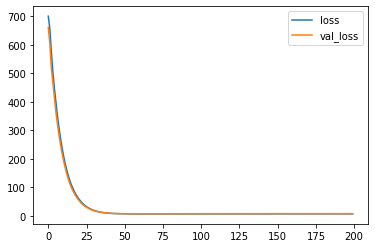

In [ ]:
feats= SMRfeat()
X_feat = feats.fit_transform(xtensor)
net= MCSMRDNN(verbose=1,epochs=200,l1_param=1e-3,l2_param=1e-3,validation_split=0.1,plot_hst=True,alpha_dropout=False)
predict_data = net.fit(X_feat , zpca)

mdl = net.get_model()
w = get_weigths(mdl,3)

### Plots MC

In [ ]:
db = loaddb.PhysionetMMI('databases/PhysionetMMI')
channels_names = ['FC5', 'FC3', 'FC1', 'FCz', 'FC2', 'FC4', 'FC6', 'C5', 'C3', 'C1', 'Cz', 'C2', 'C4', 'C6', 'CP5', 'CP3', 'CP1', 'CPz', 'CP2', 'CP4', 'CP6', 'Fp1', 'Fpz', 'Fp2', 'AF7', 'AF3', 'AFz', 'AF4', 'AF8', 'F7', 'F5', 'F3', 'F1', 'Fz', 'F2', 'F4', 'F6', 'F8', 'FT7', 'FT8', 'T7', 'T8', 'T9', 'T10', 'TP7', 'TP8', 'P7', 'P5', 'P3', 'P1', 'Pz', 'P2', 'P4', 'P6', 'P8', 'PO7', 'PO3', 'POz', 'PO4', 'PO8', 'O1', 'Oz', 'O2', 'Iz'] 

montage = mne.channels.read_montage(db.metadata['montage'])

Model = {}
#Model["model"] = mdl
Model["weigths"] = w
Model["Ch_names"] = channels_names
Model["montage"] = montage

with open(Path_def+'models/'+folder_name+'wPLI_3f_MC.p','wb') as handle:
                pickle.dump(Model,handle)

/usr/local/lib/python3.6/dist-packages/mne/utils/docs.py:824: DeprecationWarning: Function read_montage is deprecated; ``read_montage`` is deprecated and will be removed in v0.20. Please use ``read_dig_fif``, ``read_dig_egi``, ``read_custom_montage``, or ``read_dig_captrack`` to read a digitization based on your needs instead; or ``make_standard_montage`` to create ``DigMontage`` based on template; or ``make_dig_montage`` to create a ``DigMontage`` out of np.arrays
  warnings.warn(msg, category=DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/mne/utils/docs.py:807: DeprecationWarning: Class Montage is deprecated; Montage class is deprecated and will be removed in v0.20. Please use DigMontage instead.
  warnings.warn(msg, category=DeprecationWarning)


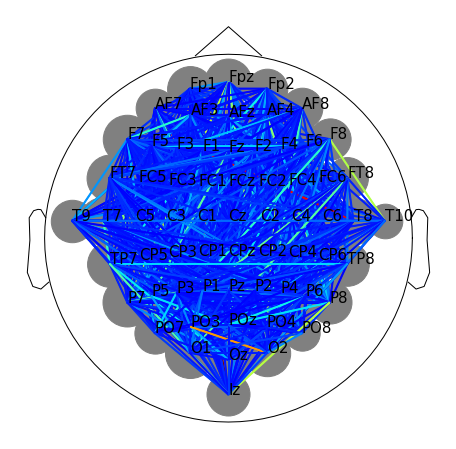

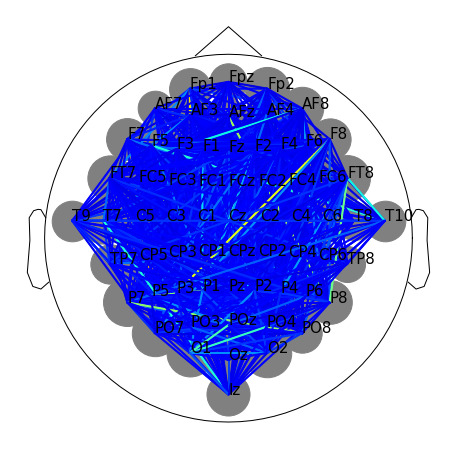

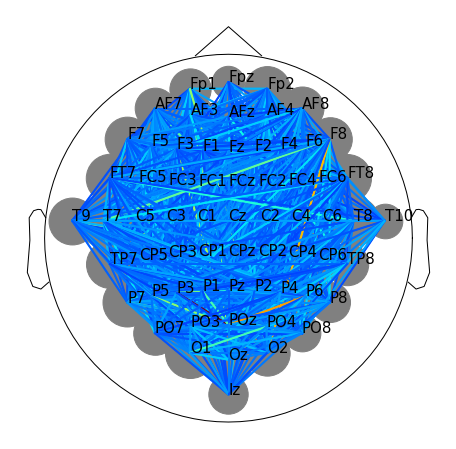

In [ ]:
#plot_topomap_cx(w[0],512, channels_names,montage,Ch=len(channels_names), thr=0.6,size=(8,8),mode="topo",colormap=False,save=True,name=Path_def+'Topoplots/wPLI_3f_MC_topo_t')
plot_topomap_cx(w[0],512, channels_names,montage,Ch=len(channels_names), thr=tr,size=(8,8),mode="Cx",colormap=False,save=True,name=Path_def+'Topoplots/'+folder_name+'wPLI_3f_MC_Cx_t')
#plot_topomap_cx(w[0],512, channels_names,montage,Ch=len(channels_names), thr=0.6,size=(8,8),mode="All",cmaps="Reds",colormap=False,save=True,name=Path_def+'Topoplots/wPLI_3f_MC_All_t')

#plot_topomap_cx(w[1],512, channels_names,montage,Ch=len(channels_names), thr=0.6,size=(8,8),mode="topo",colormap=False,save=True,name=Path_def+'Topoplots/wPLI_3f_MC_topo_u')
plot_topomap_cx(w[1],512, channels_names,montage,Ch=len(channels_names), thr=tr,size=(8,8),mode="Cx",colormap=False,save=True,name=Path_def+'Topoplots/'+folder_name+'wPLI_3f_MC_Cx_u')
#plot_topomap_cx(w[1],512, channels_names,montage,Ch=len(channels_names), thr=0.6,size=(8,8),mode="All",cmaps="Reds",colormap=False,save=True,name=Path_def+'Topoplots/wPLI_3f_MC_All_u')

#plot_topomap_cx(w[2],512, channels_names,montage,Ch=len(channels_names), thr=0.6,size=(8,8),mode="topo",colormap=False,save=True,name=Path_def+'Topoplots/wPLI_3f_MC_topo_B')
plot_topomap_cx(w[2],512, channels_names,montage,Ch=len(channels_names), thr=tr,size=(8,8),mode="Cx",colormap=False,save=True,name=Path_def+'Topoplots/'+folder_name+'wPLI_3f_MC_Cx_B')
#plot_topomap_cx(w[2],512, channels_names,montage,Ch=len(channels_names), thr=0.6,size=(8,8),mode="All",cmaps="Reds",colormap=False,save=True,name=Path_def+'Topoplots/wPLI_3f_MC_All_B')

## PLV

### Load Data

In [11]:
FILEID = "1dvuv8b5Ld6aKIVmJ5kOaMxHm3u5GCvch"
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id='$FILEID -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id="$FILEID -O connectividades_daniel.zip && rm -rf /tmp/cookies.txt
!dir
!unzip connectividades_daniel.zip

--2021-01-25 22:52:34--  https://docs.google.com/uc?export=download&confirm=&id=1dvuv8b5Ld6aKIVmJ5kOaMxHm3u5GCvch
Resolving docs.google.com (docs.google.com)... 74.125.195.139, 74.125.195.113, 74.125.195.100, ...
Connecting to docs.google.com (docs.google.com)|74.125.195.139|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0c-10-docs.googleusercontent.com/docs/securesc/ugd7r7buq94kk7kol9lrcdksmj1c82go/fguhh31ugs598juc5nit82fa13t8cg74/1611615150000/17600740636788319470/05346386840750624001Z/1dvuv8b5Ld6aKIVmJ5kOaMxHm3u5GCvch?e=download [following]
--2021-01-25 22:52:36--  https://doc-0c-10-docs.googleusercontent.com/docs/securesc/ugd7r7buq94kk7kol9lrcdksmj1c82go/fguhh31ugs598juc5nit82fa13t8cg74/1611615150000/17600740636788319470/05346386840750624001Z/1dvuv8b5Ld6aKIVmJ5kOaMxHm3u5GCvch?e=download
Resolving doc-0c-10-docs.googleusercontent.com (doc-0c-10-docs.googleusercontent.com)... 74.125.20.132, 2607:f8b0:400e:c07::84
Connecting to d

In [12]:
sc_ma = StandardScaler()
ma_z = sc_ma.fit_transform(pickle.load(open( "phy_y.pickle", "rb" )))
zpca = StandardScaler().fit_transform(ma_z)
zpca.shape

xtensor = pickle.load( open( "connectividad_daniel_phy_3bandas.pickle", "rb" ) )[:,:,:,0]


### training no MC

Epoch 1/200
3/3 [==============================] - 3s 257ms/step - loss: 721.5548 - val_loss: 667.7714
Epoch 2/200
3/3 [==============================] - 0s 59ms/step - loss: 658.2457 - val_loss: 581.5575
Epoch 3/200
3/3 [==============================] - 0s 61ms/step - loss: 566.7269 - val_loss: 510.3443
Epoch 4/200
3/3 [==============================] - 0s 57ms/step - loss: 497.6802 - val_loss: 447.9989
Epoch 5/200
3/3 [==============================] - 0s 113ms/step - loss: 436.7663 - val_loss: 391.8349
Epoch 6/200
3/3 [==============================] - 0s 58ms/step - loss: 381.2807 - val_loss: 341.0219
Epoch 7/200
3/3 [==============================] - 0s 58ms/step - loss: 331.1661 - val_loss: 295.5204
Epoch 8/200
3/3 [==============================] - 0s 58ms/step - loss: 286.8521 - val_loss: 255.4712
Epoch 9/200
3/3 [==============================] - 0s 59ms/step - loss: 248.1919 - val_loss: 220.9786
Epoch 10/200
3/3 [==============================] - 0s 57ms/step - loss: 214.755

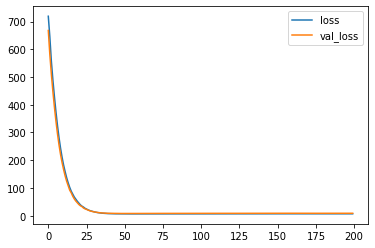

In [13]:
feats= SMRfeat()
X_feat = feats.fit_transform(xtensor)
net= SMRDNN(verbose=1,epochs=200,l1_param=1e-3,l2_param=1e-3,validation_split=0.1)
predict_data = net.fit(X_feat , zpca)

mdl = net.get_model()
w = get_weigths(mdl,3)

(array([  1.,   1.,   2.,   4.,   1.,   4.,   9.,  21.,  24.,  35.,  41.,
         57.,  75., 100., 104., 102., 108., 112., 121., 134., 121., 119.,
        119., 102.,  73.,  79.,  53.,  41.,  47.,  34.,  18.,  18.,  10.,
          8.,  18.,  10.,   7.,  11.,   7.,   5.,   5.,   5.,   4.,   0.,
          2.,   3.,   2.,   2.,   2.,   1.,   0.,   2.,   0.,   3.,   2.,
          2.,   2.,   3.,   3.,   1.,   0.,   0.,   0.,   0.,   3.,   0.,
          0.,   0.,   0.,   0.,   1.,   1.,   0.,   1.,   1.,   1.,   0.,
          1.,   1.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   1.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   2.]),
 array([0.       , 0.0078125, 0.015625 , 0.0234375, 0.03125  , 0.0390625,
        0.046875 , 0.0546875, 0.0625   , 0.0703125, 0.078125

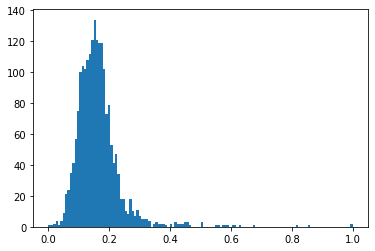

In [14]:
plt.hist(w[1],bins=128)
plt.ylim(0,230)

### Plots no MC

In [ ]:
db = loaddb.PhysionetMMI('databases/PhysionetMMI')
channels_names = ['FC5', 'FC3', 'FC1', 'FCz', 'FC2', 'FC4', 'FC6', 'C5', 'C3', 'C1', 'Cz', 'C2', 'C4', 'C6', 'CP5', 'CP3', 'CP1', 'CPz', 'CP2', 'CP4', 'CP6', 'Fp1', 'Fpz', 'Fp2', 'AF7', 'AF3', 'AFz', 'AF4', 'AF8', 'F7', 'F5', 'F3', 'F1', 'Fz', 'F2', 'F4', 'F6', 'F8', 'FT7', 'FT8', 'T7', 'T8', 'T9', 'T10', 'TP7', 'TP8', 'P7', 'P5', 'P3', 'P1', 'Pz', 'P2', 'P4', 'P6', 'P8', 'PO7', 'PO3', 'POz', 'PO4', 'PO8', 'O1', 'Oz', 'O2', 'Iz'] 

montage = mne.channels.read_montage(db.metadata['montage'])

Model["weigths"] = w
Model["Ch_names"] = channels_names
Model["montage"] = montage

with open(Path_def+'models/'+folder_name+'PLV_3f.p','wb') as handle:
                pickle.dump(Model,handle)

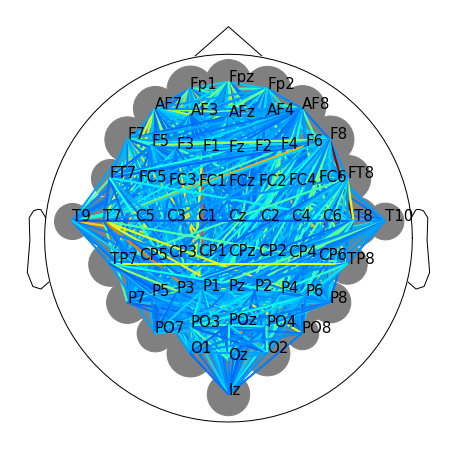

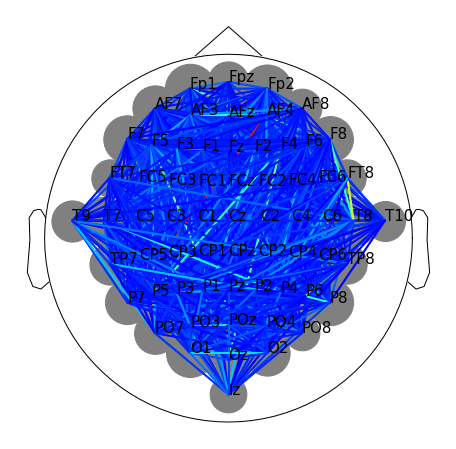

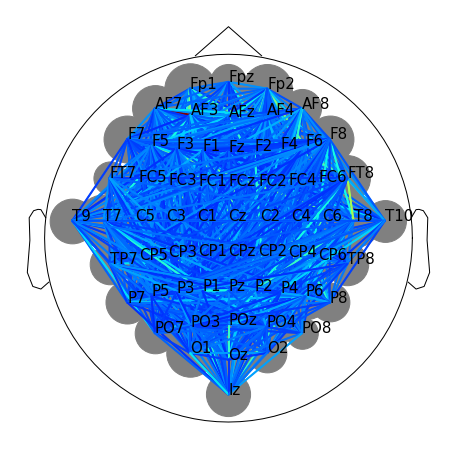

In [ ]:
#plot_topomap_cx(w[0],512, channels_names,montage,Ch=len(channels_names), thr=0.6,size=(8,8),mode="topo",colormap=False,save=True,name=Path_def+'Topoplots/PLV_3f_topo_t')
plot_topomap_cx(w[0],512, channels_names,montage,Ch=len(channels_names), thr=tr,size=(8,8),mode="Cx",colormap=False,save=True,name=Path_def+'Topoplots/'+folder_name+'PLV_3f_Cx_t')
#plot_topomap_cx(w[0],512, channels_names,montage,Ch=len(channels_names), thr=0.6,size=(8,8),mode="All",cmaps="Reds",colormap=False,save=True,name=Path_def+'Topoplots/PLV_3f_All_t')

#plot_topomap_cx(w[1],512, channels_names,montage,Ch=len(channels_names), thr=0.6,size=(8,8),mode="topo",colormap=False,save=True,name=Path_def+'Topoplots/PLV_3f_topo_u')
plot_topomap_cx(w[1],512, channels_names,montage,Ch=len(channels_names), thr=tr,size=(8,8),mode="Cx",colormap=False,save=True,name=Path_def+'Topoplots/'+folder_name+'PLV_3f_Cx_u')
#plot_topomap_cx(w[1],512, channels_names,montage,Ch=len(channels_names), thr=0.6,size=(8,8),mode="All",cmaps="Reds",colormap=False,save=True,name=Path_def+'Topoplots/PLV_3f_All_u')

#plot_topomap_cx(w[2],512, channels_names,montage,Ch=len(channels_names), thr=0.6,size=(8,8),mode="topo",colormap=False,save=True,name=Path_def+'Topoplots/PLV_3f_topo_B')
plot_topomap_cx(w[2],512, channels_names,montage,Ch=len(channels_names), thr=tr,size=(8,8),mode="Cx",colormap=False,save=True,name=Path_def+'Topoplots/'+folder_name+'PLV_3f_Cx_B')
#plot_topomap_cx(w[2],512, channels_names,montage,Ch=len(channels_names), thr=0.6,size=(8,8),mode="All",cmaps="Reds",colormap=False,save=True,name=Path_def+'Topoplots/PLV_3f_All_B')

### Training MC

Epoch 1/200
3/3 [==============================] - 1s 137ms/step - loss: 716.4621 - val_loss: 697.2673
Epoch 2/200
3/3 [==============================] - 0s 62ms/step - loss: 675.6464 - val_loss: 587.1769
Epoch 3/200
3/3 [==============================] - 0s 58ms/step - loss: 576.6725 - val_loss: 514.0058
Epoch 4/200
3/3 [==============================] - 0s 59ms/step - loss: 506.1691 - val_loss: 456.0290
Epoch 5/200
3/3 [==============================] - 0s 58ms/step - loss: 445.1873 - val_loss: 400.8506
Epoch 6/200
3/3 [==============================] - 0s 61ms/step - loss: 391.0690 - val_loss: 350.9473
Epoch 7/200
3/3 [==============================] - 0s 57ms/step - loss: 341.4565 - val_loss: 304.7347
Epoch 8/200
3/3 [==============================] - 0s 58ms/step - loss: 295.9921 - val_loss: 263.9612
Epoch 9/200
3/3 [==============================] - 0s 59ms/step - loss: 256.1243 - val_loss: 228.4894
Epoch 10/200
3/3 [==============================] - 0s 60ms/step - loss: 221.6572

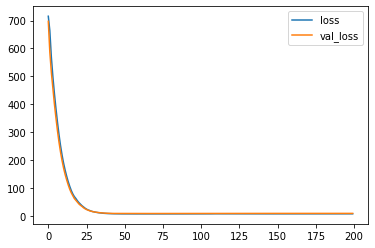

In [15]:
feats= SMRfeat()
X_feat = feats.fit_transform(xtensor)
net= MCSMRDNN(verbose=1,epochs=200,l1_param=1e-3,l2_param=1e-3,validation_split=0.1,plot_hst=True,alpha_dropout=False)
predict_data = net.fit(X_feat , zpca)

mdl = net.get_model()
w = get_weigths(mdl,3)

(array([  1.,   0.,   1.,   3.,   4.,   6.,  26.,  39.,  72.,  83., 127.,
        155., 182., 211., 172., 196., 157., 142., 106.,  78.,  43.,  44.,
         35.,  19.,  13.,  14.,   9.,  11.,   5.,   6.,   3.,  10.,   3.,
          2.,   5.,   3.,   1.,   1.,   1.,   2.,   1.,   1.,   2.,   0.,
          1.,   1.,   1.,   0.,   1.,   1.,   0.,   0.,   4.,   1.,   0.,
          1.,   0.,   3.,   0.,   1.,   1.,   1.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([0.       , 0.0078125, 0.015625 , 0.0234375, 0.03125  , 0.0390625,
        0.046875 , 0.0546875, 0.0625   , 0.0703125, 0.078125

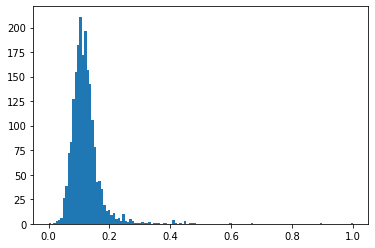

In [16]:
plt.hist(w[1],bins=128)

### Plots MC

In [ ]:
db = loaddb.PhysionetMMI('databases/PhysionetMMI')
channels_names = ['FC5', 'FC3', 'FC1', 'FCz', 'FC2', 'FC4', 'FC6', 'C5', 'C3', 'C1', 'Cz', 'C2', 'C4', 'C6', 'CP5', 'CP3', 'CP1', 'CPz', 'CP2', 'CP4', 'CP6', 'Fp1', 'Fpz', 'Fp2', 'AF7', 'AF3', 'AFz', 'AF4', 'AF8', 'F7', 'F5', 'F3', 'F1', 'Fz', 'F2', 'F4', 'F6', 'F8', 'FT7', 'FT8', 'T7', 'T8', 'T9', 'T10', 'TP7', 'TP8', 'P7', 'P5', 'P3', 'P1', 'Pz', 'P2', 'P4', 'P6', 'P8', 'PO7', 'PO3', 'POz', 'PO4', 'PO8', 'O1', 'Oz', 'O2', 'Iz'] 

montage = mne.channels.read_montage(db.metadata['montage'])

Model["weigths"] = w
Model["Ch_names"] = channels_names
Model["montage"] = montage

with open(Path_def+'models/'+folder_name+'PLV_3f_MC.p','wb') as handle:
                pickle.dump(Model,handle)

In [ ]:
#plot_topomap_cx(w[0],512, channels_names,montage,Ch=len(channels_names), thr=0.6,size=(8,8),mode="topo",colormap=False,save=True,name=Path_def+'Topoplots/PLV_3f_MC_topo_t')
plot_topomap_cx(w[0],512, channels_names,montage,Ch=len(channels_names), thr=tr,size=(8,8),mode="Cx",colormap=False,save=True,name=Path_def+'Topoplots/'+folder_name+'PLV_3f_MC_Cx_t')
#plot_topomap_cx(w[0],512, channels_names,montage,Ch=len(channels_names), thr=0.6,size=(8,8),mode="All",cmaps="Reds",colormap=False,save=True,name=Path_def+'Topoplots/PLV_3f_MC_All_t')

#plot_topomap_cx(w[1],512, channels_names,montage,Ch=len(channels_names), thr=0.6,size=(8,8),mode="topo",colormap=False,save=True,name=Path_def+'Topoplots/PLV_3f_MC_topo_u')
plot_topomap_cx(w[1],512, channels_names,montage,Ch=len(channels_names), thr=tr,size=(8,8),mode="Cx",colormap=False,save=True,name=Path_def+'Topoplots/'+folder_name+'PLV_3f_MC_Cx_u')
#plot_topomap_cx(w[1],512, channels_names,montage,Ch=len(channels_names), thr=0.6,size=(8,8),mode="All",cmaps="Reds",colormap=False,save=True,name=Path_def+'Topoplots/PLV_3f_MC_All_u')

#plot_topomap_cx(w[2],512, channels_names,montage,Ch=len(channels_names), thr=0.6,size=(8,8),mode="topo",colormap=False,save=True,name=Path_def+'Topoplots/PLV_3f_MC_topo_B')
plot_topomap_cx(w[2],512, channels_names,montage,Ch=len(channels_names), thr=tr,size=(8,8),mode="Cx",colormap=False,save=True,name=Path_def+'Topoplots/'+folder_name+'PLV_3f_MC_Cx_B')
#plot_topomap_cx(w[2],512, channels_names,montage,Ch=len(channels_names), thr=0.6,size=(8,8),mode="All",cmaps="Reds",colormap=False,save=True,name=Path_def+'Topoplots/PLV_3f_MC_All_B')